|■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ | 99.9%


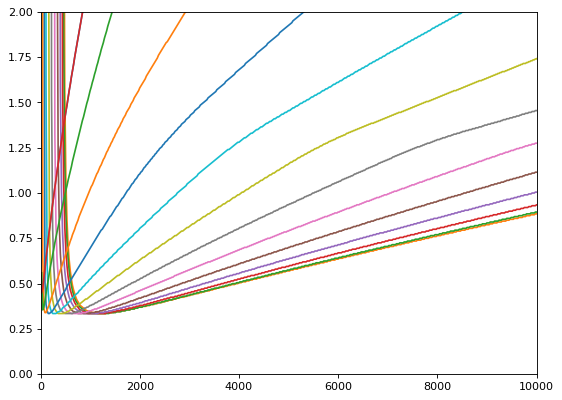

In [4]:
import os
import csv
import sys
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import clear_output

def progressbar(progress):
    clear_output(wait=True)
    string = ""
    string += "|"
    for i in range (0, int(progress*60)):
        string += "■"
    for i in range (int(progress*60),60):
        string += " "
    string += "|"
    print(string + " " + '{:.3}'.format(progress*100) + "%")
    

plt.figure(figsize=(8, 6), dpi=144)

file = open("電界分布計算結果.csv")
csv_reader = csv.reader(file)

n = []
r = []
z = []
V = []
Er = []
Ez = []
E = []
alpha = []
pcmhg = [i/30 for i in range (1, 800)]#(cmHg)
#print(pcmhg)
ppa = [(101325.0/760.0) * k * 10 for k in pcmhg]
ptorr = [i * 0.00750062 for i in ppa] #P(torr)

n = []
pd = []
vs_list = []
vs_path_list = []
d = 0.5
K = 10

path_list = [1,102,203,305,406,507,609,711,812,914,1016,1118,1220,1322]

#データ読み込み
for row in csv_reader:
    n.append(row[0])
    r.append(float(row[1])*10)
    z.append(float(row[2])*10)
    V.append(float(row[3]))
    Er.append(float(row[4]))
    Ez.append(float(row[5]))
    E.append(float(row[6])*1000)

vs_min_list = []
    
for i in range (0, 13):
    vs_min_list.append([])

for k in range (0, len(ptorr)):
    #clear_output(wait=True)
    progressbar(k/len(ptorr))
    vs_path_list = []
    for path in range (0,13):  #すべてのpathを試す
        vs = 0
        integral = 0
        while (integral*2 < K):   #Vを変えて試す　積分がKを上回ったらおわり
            vs += 0.005      #Vを0Vから0.1ずつ増やしていく
    
            #数値積分-------------------------------
    
            integral = 0
            for i in range (path_list[path]+1, path_list[path+1]): #z=0~0.5で積分 (gap=0.5, r=0のデータを使う)
                Enew = vs * E[i]  #vsに合わせてEも調整
                #print(z[i])
                #alphaの計算  % 
                if(Enew/ptorr[k]<31.6):
                    #print(" v=",vs," integ=",integral, " alpha=",alpha)
                    alpha = 0                    
                elif (31.6 <= Enew/ptorr[k] and Enew/ptorr[k] < 60):
                    #print(" v=",vs," integ=",integral, " alpha=",alpha)
                    alpha = ptorr[k]/10000.0*(1.047*(Enew/ptorr[k]-28.5)**2-12.6)
                elif (60.0 <= Enew/ptorr[k] and Enew/ptorr[k] < 100.0):
                    #print(" v=",vs," integ=",integral, " alpha=",alpha)
                    alpha = (1.0-0.00674755*(Enew/ptorr[k]-60.0))*ptorr[k]/10000.0*1.047*((Enew/ptorr[k]-28.5)**2-12.6)
                elif (Enew/ptorr[k] > 100.0):
                    #print(" v=",vs," integ=",integral, " alpha=",alpha)
                    alpha = 15.0 * ptorr[k] * math.exp(-365.0/(Enew/ptorr[k]))
            
                integral += np.sqrt((z[i]-z[i-1])**2+(r[i]-r[i-1])**2)*0.1*alpha  #積分
            
            #------------------------------------

            if (vs>10): break
        vs_min_list[path].append(vs)

    pd.append(ppa[k]*d)   #[Pa・mm]
    vs_list.append(vs)

plt.plot(pd,vs_list)
plt.xlim(0,10000)
plt.ylim(0,2)

for i in range (0,13):
    plt.plot(pd,vs_min_list[i])

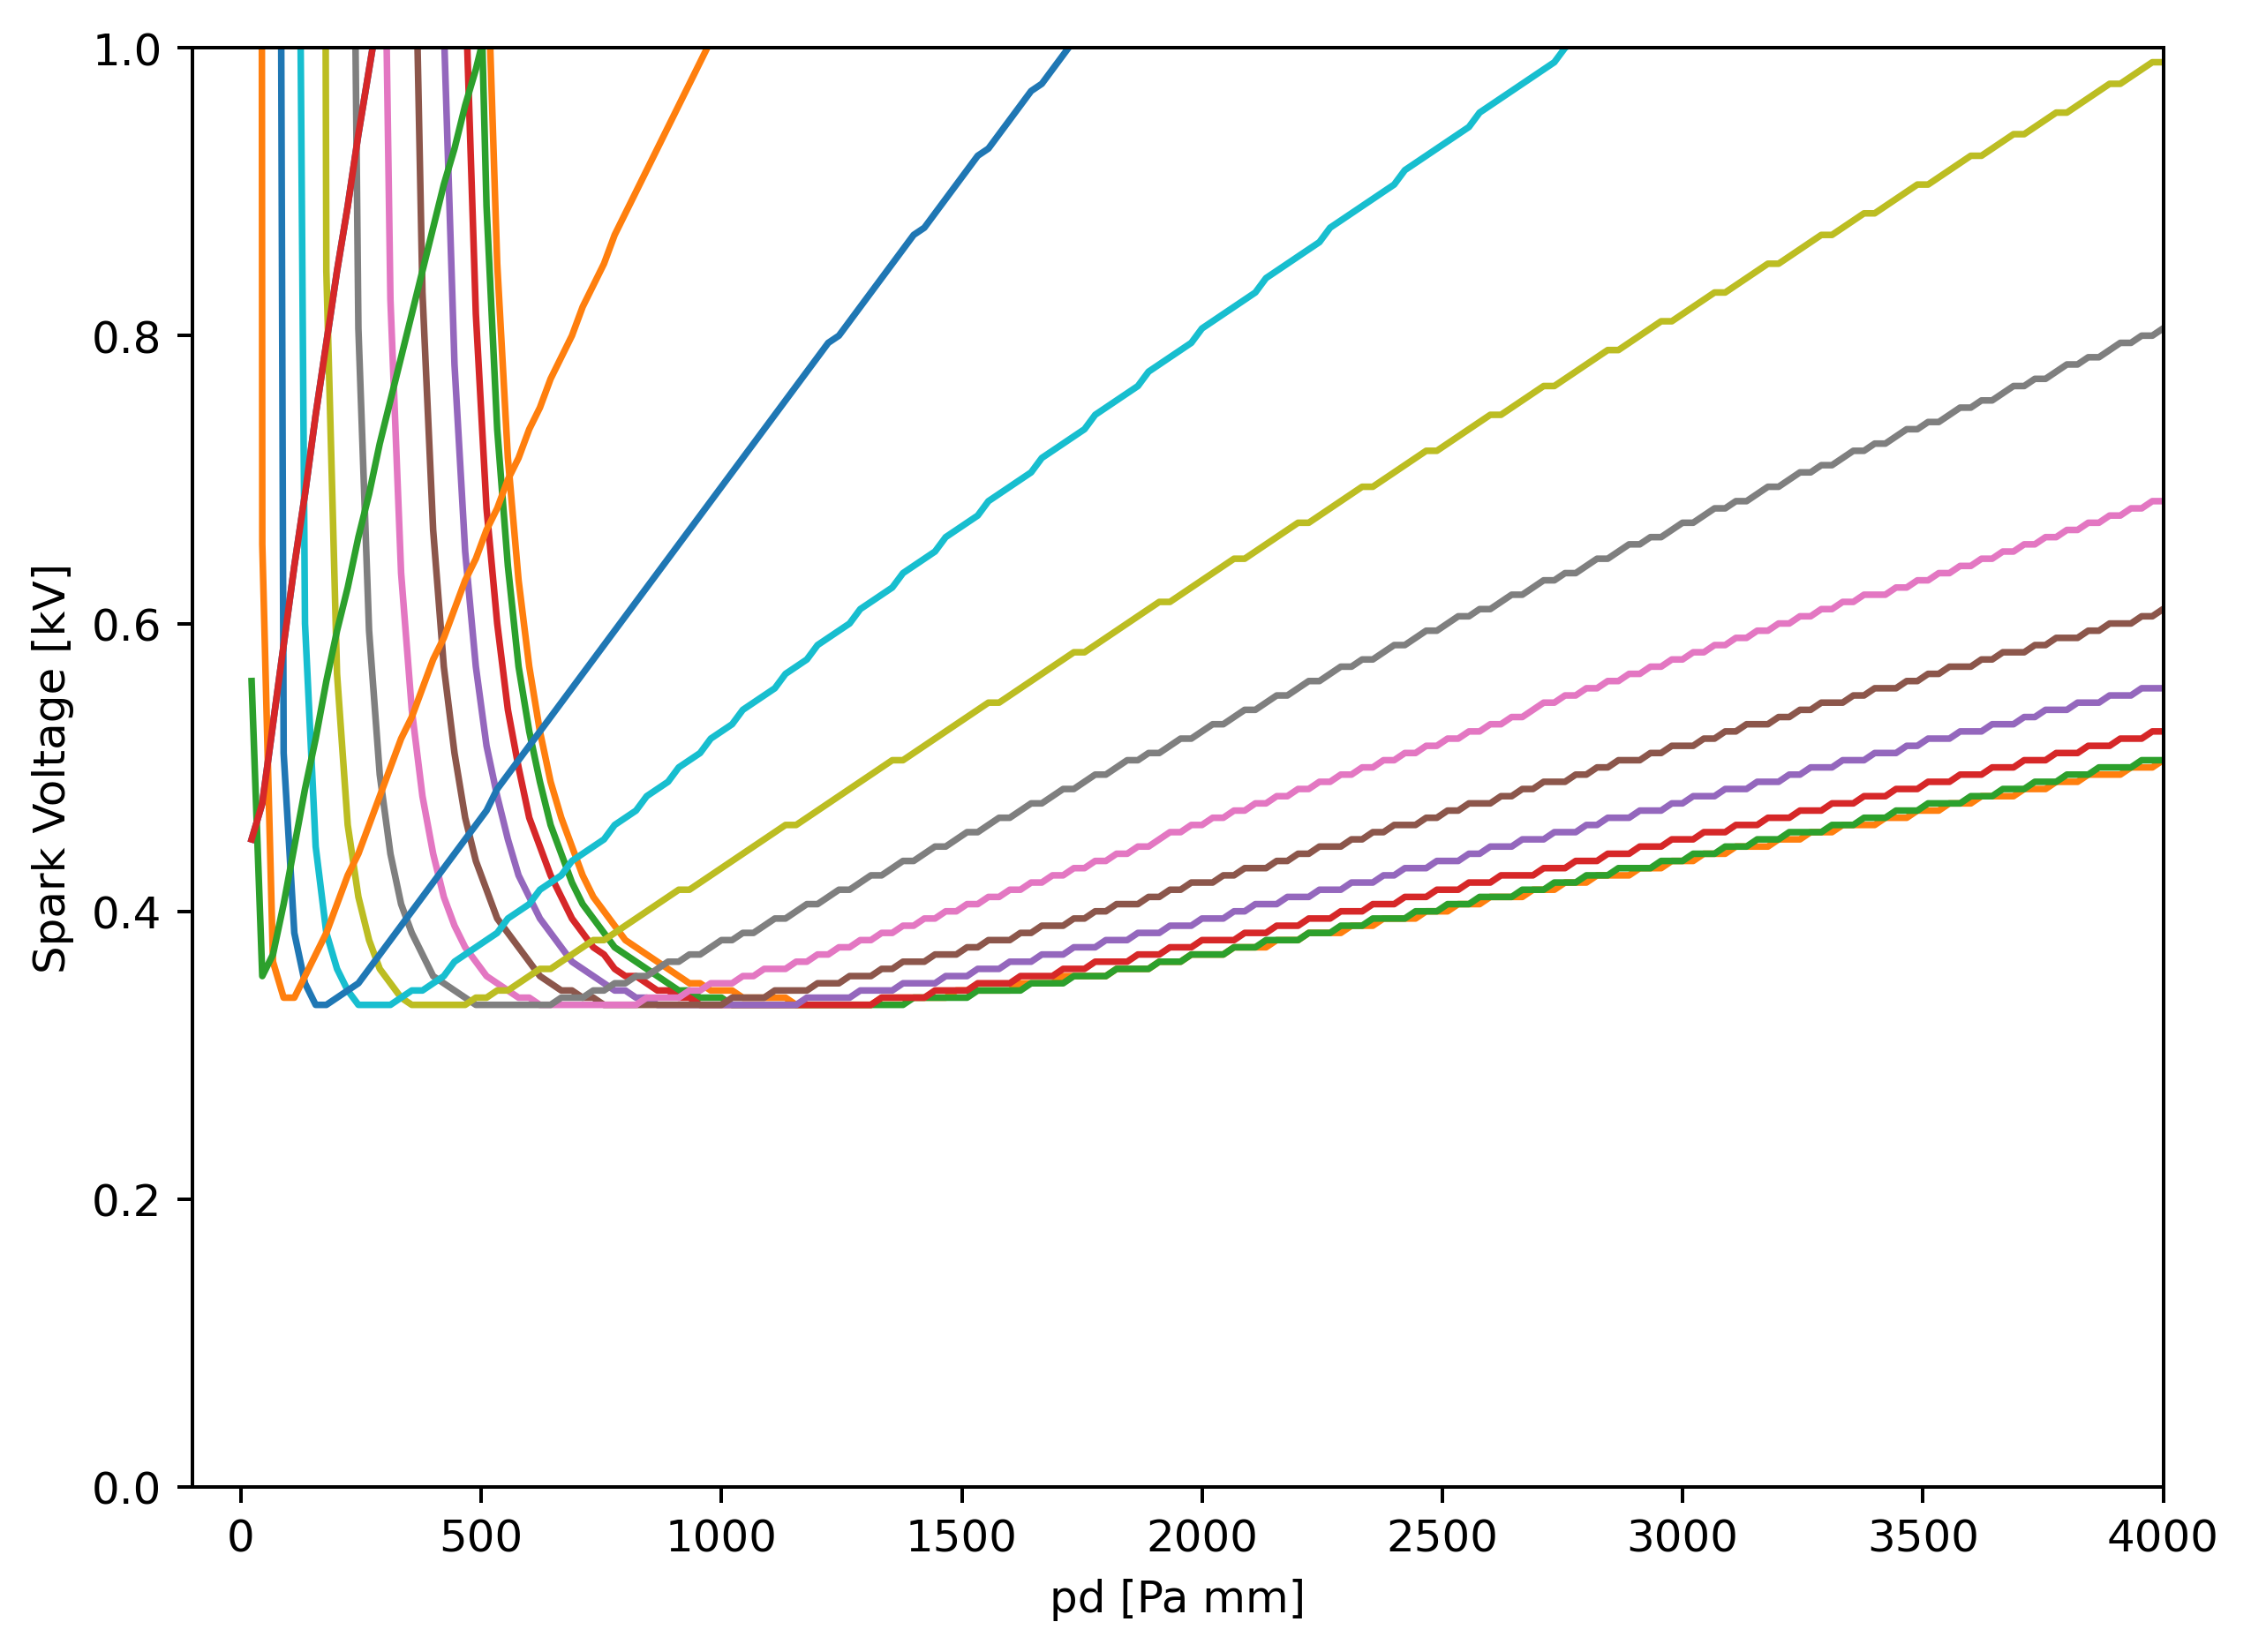

In [19]:
plt.figure(figsize=(8, 6), dpi=360)

plt.plot(pd,vs_list)
plt.xlim(-100,4000)
plt.ylim(0,1.0)


for i in range (0,13):
    plt.plot(pd,vs_min_list[i])
plt.xlabel("pd [Pa mm]")
plt.ylabel("Spark Voltage [kV]")
plt.savefig("figures/curves.png")

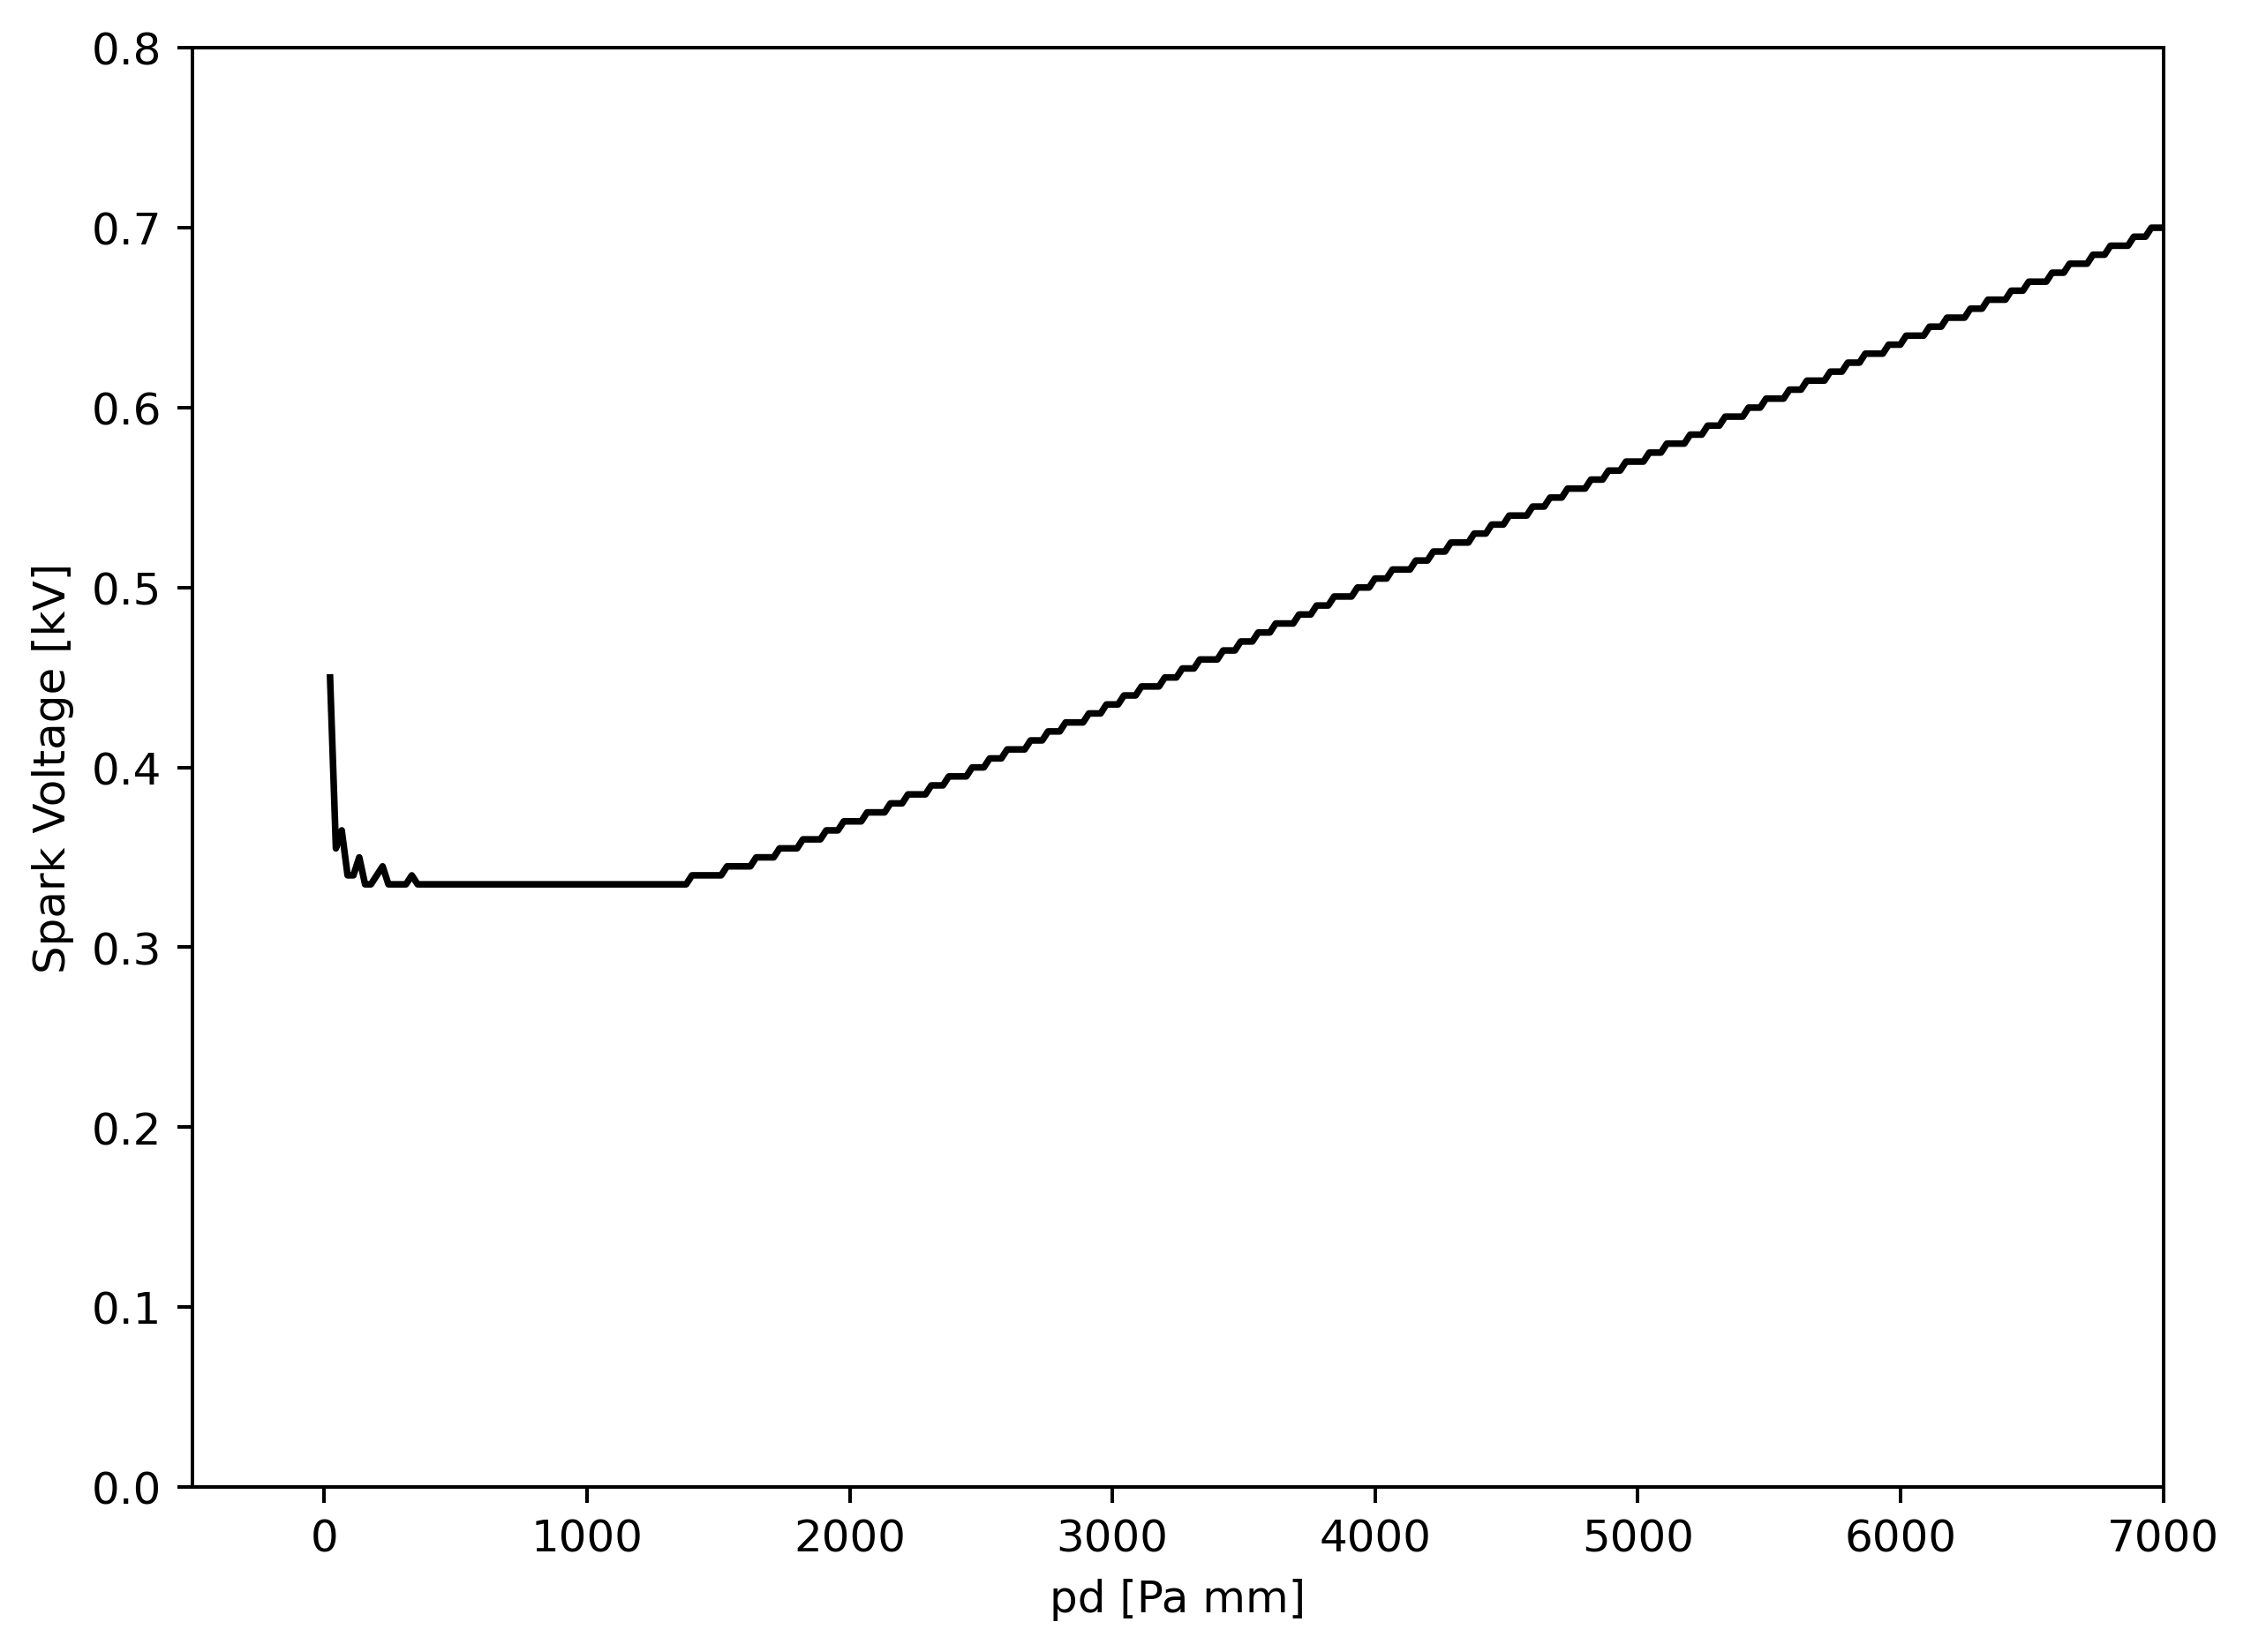

In [18]:
plt.figure(figsize=(8, 6), dpi=360)
the_list = [] 
min_list = []
for i in range (0, len(vs_min_list[0])):
    the_list = []
    for k in range (0, len(vs_min_list)):
        the_list.append(vs_min_list[k][i]) 
    min_list.append(min(the_list))
plt.xlim(-500,7000)
plt.ylim(0,0.8)
plt.ylabel("Spark Voltage [kV]")
plt.xlabel("pd [Pa mm]")
plt.plot(pd,min_list,c="black")
plt.savefig("figures/minimums.png")

In [7]:
import matplotlib.pyplot as plt

pd1 = [9797.55,29392.65,48987.75,27526.45,82179.45,136965.75,48987.75,147363.15,246271.75,74714.65,223744.05,372906.75,101907.85,305723.55,509539.25]

sparkv1 = [[0.66,1.74,2.52,1.2,3.51,5.5,1.4,5.3,8.9,1.91,7.23,11.82,2.33,9.1,15.32],
[0.69,1.64,2.53,0.96,3.4,5.59,1.44,5.25,8.43,1.92,7.26,11.88,2.35,9.11,15.3],
[0.64,1.61,2.6,1.03,3.39,5.47,1.42,5.28,8.5,1.91,7.26,11.91,2.31,9.15,15.38]]

av1 = []
for i in range (0, len(sparkv1[0])):
    av1.append((sparkv1[0][i]+sparkv1[1][i]+sparkv1[2][i])/3)

pd2 = [110,360,750,440,1350,2300,973,2061,2715,1800,5700,12500,2800,8400,14500]

sparkv2 = [[0.44,0.38,0.36,0.41,0.39,0.46,0.38,0.37,0.5,0.4,0.62,0.76,0.44,0.7,0.8],
[0.4,0.37,0.37,0.37,0.38,0.54,0.35,0.44,0.46,0.4,0.54,0.77,0.4,0.65,0.8],
[0.41,0.38,0.38,0.36,0.37,0.44,0.37,0.4,0.46,0.38,0.61,0.76,0.44,0.65,0.79]]

av2= []
for i in range (0, len(sparkv2[0])):
    av2.append((sparkv2[0][i]+sparkv2[1][i]+sparkv2[2][i])/3)

pd1 = [i/1000 for i in pd1]
pd2 = [i/1000 for i in pd2]

sortedpd1, sortedav1 = zip(*sorted(zip(pd1, av1)))
sortedpd2, sortedav2 = zip(*sorted(zip(pd2, av2)))

#pd1, av1 
#pd2, av2 = zip(*sorted(zip(pd2, av2)))

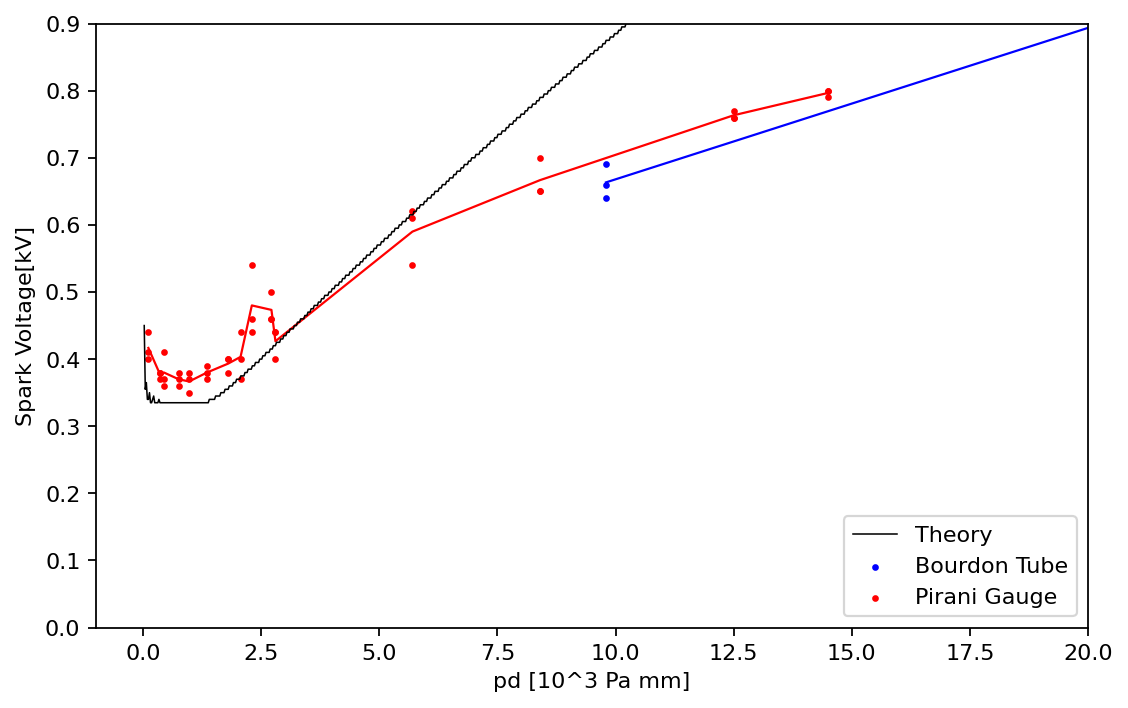

In [14]:
plt.figure(figsize=(8, 5), dpi=160)

plt.scatter(pd1,sparkv1[0], s = 4, c="blue", label="Bourdon Tube")
plt.scatter(pd1,sparkv1[1], s = 4, c="blue")
plt.scatter(pd1,sparkv1[2], s = 4, c="blue")
plt.plot(sortedpd1,sortedav1,c="blue",linewidth = 1)

plt.scatter(pd2,sparkv2[0], s = 4, c="red", label = "Pirani Gauge")
plt.scatter(pd2,sparkv2[1], s = 4, c="red")
plt.scatter(pd2,sparkv2[2], s = 4, c="red")
plt.plot(sortedpd2,sortedav2,c="red",linewidth = 1)

pdnew = [i/1000 for i in pd]
plt.plot(pdnew,min_list,label="Theory",color="black",linewidth=0.7)

plt.xlim(-1,20)
plt.ylim(0.0, 0.9)
plt.xlabel("pd [10^3 Pa mm]")
plt.ylabel("Spark Voltage[kV]")
plt.legend(loc="lower right")

plt.savefig("figures/withtheory.png")